# Buisness Problem:- Citibank defaulters

Help Citibank predict defaulters! Citibank has hired you as a Machine Learning Expert to detect default in their newly launched Citi Gold Card. They have hired you as an Machine Learning and FinTech expert. This is an extremely time sensitive and urgent project as defaulters cause substantial loss to the system. They are willing to compensate heavily! Defaulters cause annually over ~ USD 50 Billion in losses.

### Variable description

Y: Client's behavior (target); Y=0 then not default, Y=1 then default.

X1 - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family 
    (supplementary) credit.

X2 -Gender (1 = male; 2 = female).

X3 - Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others).

X4 - Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5 - Age (year).

X6-X11 - History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption; -1 = pay duly; ; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

X12-X17 - Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23 - Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [0]:
# path = "/content/drive/My Drive/Colab Notebooks/train_1.csv"


In [0]:
# path1 = '/content/drive/My Drive/Colab Notebooks/test.csv'

In [0]:
# Demonstrate imblearn package install

# !pip install imblearn

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# load the train_1 dataset
# citi = pd.read_csv('train_1.csv')
citi = pd.read_csv('train_1.csv')

In [6]:
# using shape to get the idea of number of columns and rows in dataset
citi.shape

(21600, 9)

In [7]:
citi.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [8]:
# checking for null/ missing values
citi.isna().sum().sum()

0

In [9]:
# to get an idea of of descriptive statistics like std, mean. count, min and max, etc
citi.describe()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,12000.773750,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796
std,6931.541584,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000
25%,6008.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000
50%,12001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000
75%,17995.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000


In [10]:
# takind an account of datatypes we have in our dataset
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 9 columns):
Ref.No    21600 non-null int64
X1        21600 non-null int64
X2        21600 non-null int64
X3        21600 non-null int64
X4        21600 non-null int64
X5        21600 non-null int64
X6        21600 non-null int64
X7        21600 non-null int64
Y         21600 non-null int64
dtypes: int64(9)
memory usage: 1.5 MB


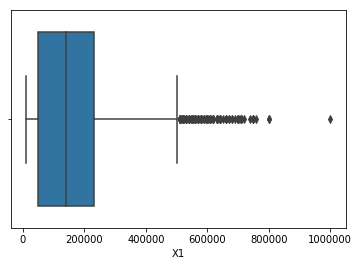

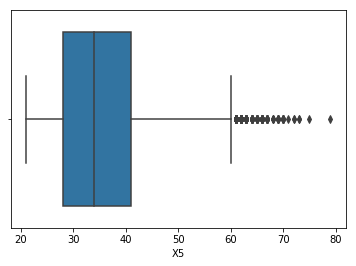

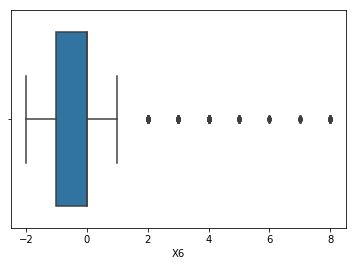

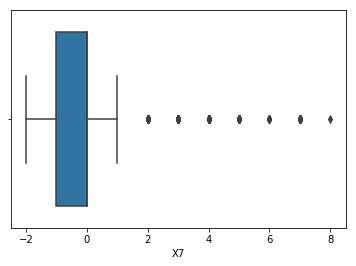

In [11]:
# creating boxplot for all numerical columns.
for col in ['X1', 'X5', 'X6', 'X7']:
    sns.boxplot(x=col, data=citi)
    plt.show()

##### Obsevations of boxplot

- on average our credit limit is somewhat between 1.5 lacs to 2 lacs shown by X1

- our dataset is comprising of people aged around 35 on average shown by X5.

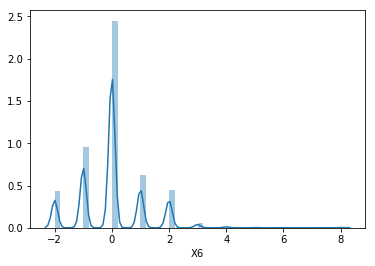

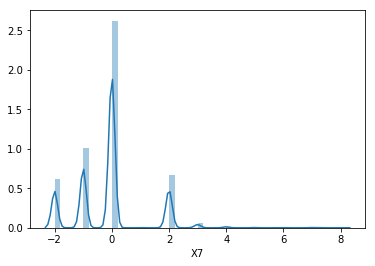

In [12]:
for i in ['X6', 'X7']:
    sns.distplot(citi[i])
    plt.show()

by observing above distplot we are getting normal curve as it have 0 mean and 1 std.

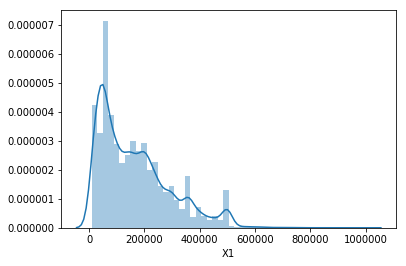

In [13]:
sns.distplot(citi.X1)

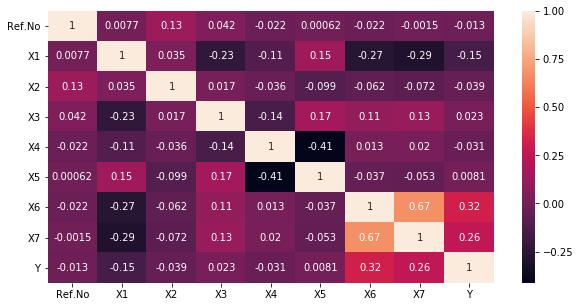

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(citi.corr(), annot = True, cbar=True)

By observing above heatmap of correlation we can surely say that our independent variables are not correlated with dependent/ target variable

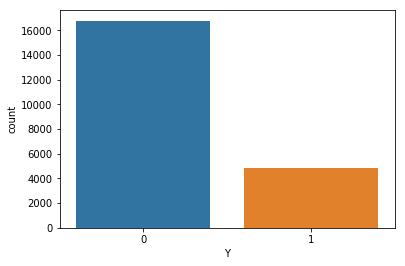

In [15]:
sns.countplot(x='Y', data=citi)

our target variable is in unbalanced state as the minority class(1) is just 22% of total data points

In [16]:
citi.Y.value_counts()

0    16766
1     4834
Name: Y, dtype: int64

In [17]:
# ref.no is not significant for our model building so we can drop it
citi.drop('Ref.No', axis = 1, inplace=True)

In [18]:
citi.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


## divding dataset and spliting into train and test

In [19]:
x = citi.drop('Y', axis = 1)
y = citi.Y

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7, test_size=0.3)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15120, 7)
(6480, 7)
(15120,)
(6480,)


### Standardizating the data

In [22]:
sc = StandardScaler()
sc_x = sc.fit_transform(x_train)
sc_xt = sc.fit_transform(x_test)

## Modelling 



In [23]:
dt = DecisionTreeClassifier()
dt.fit(sc_x, y_train)
pred_dt = dt.predict(sc_xt)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.7489197530864198

In [25]:
# param = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],
#          'max_depth': range(2, 50), 'min_samples_split': range(2, 20)}

# grid = GridSearchCV(estimator=dt, param_grid=param, cv=5)
# grid.fit(sc_x,y_train)
# print(grid.best_params_)

In [26]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, splitter= 'best')
dt.fit(sc_x, y_train)
pred_dt = dt.predict(sc_xt)

In [27]:
accuracy_score(y_test, pred_dt)

0.8257716049382716

In [32]:
citi_t = pd.read_csv('test.csv')

In [33]:
citi_t.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [34]:
req_t = citi_t.iloc[:,:8]

In [35]:
req_t.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7
0,17083,50000,2,1,2,25,0,0
1,3494,120000,2,2,2,24,0,0
2,21945,120000,2,2,2,27,1,-2
3,3499,60000,1,1,2,28,0,-1
4,18973,100000,2,1,2,28,3,2


In [36]:
req_t.drop('Ref.No', axis=1, inplace=True)

In [37]:
sc = StandardScaler()
sc_test = sc.fit_transform(req_t)

In [38]:
pred_dt_f = dt.predict(sc_test)
pred_dt_f, pred_dt_f.shape

(array([0, 0, 0, ..., 1, 1, 0], dtype=int64), (2399,))

In [39]:
# # submission
# sample = pd.read_csv("sample_submission.csv")
# solution = pd.DataFrame({'ref.no':sample['Ref.No'], 'Y':pred_dt_f})
# # export to kaggle
# solution.to_csv('citi_dt.csv', index= False)

# Train 2 dataset

In [0]:
# path2= '/content/drive/My Drive/Colab Notebooks/train_2.csv'

In [40]:
train2 = pd.read_csv('train_2.csv')

In [41]:
train2.head()

,Ref.No,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,0,0,0,0,20415,18266,18921,19297
3,15085,0,0,0,-1,76015,77582,60311,62471
4,6192,-2,-2,-2,-2,0,0,0,0


In [42]:
citi.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


In [44]:
citi = pd.read_csv('train_1.csv')

In [45]:
ntrain = pd.merge(citi, train2, on='Ref.No')

In [46]:
ntrain.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,15085,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,6192,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [47]:
ntrain.shape

(21600, 17)

In [48]:
ntrain.describe()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000
mean,12000.773750,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796,-0.157176,-0.214213,-0.254028,-0.280139,50382.807546,48332.562407,4.607888e+04,42103.725417
std,6931.541584,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797,1.203906,1.165579,1.137746,1.157968,72570.827360,70167.264656,6.812077e+04,62928.222402
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000
25%,6008.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,3633.750000,3102.000000,2.778000e+03,2311.500000
50%,12001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22182.000000,21095.500000,1.997800e+04,18893.000000
75%,17995.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65073.250000,61886.750000,5.879275e+04,51549.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000


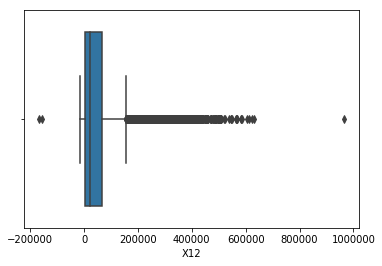

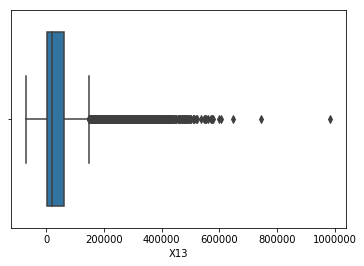

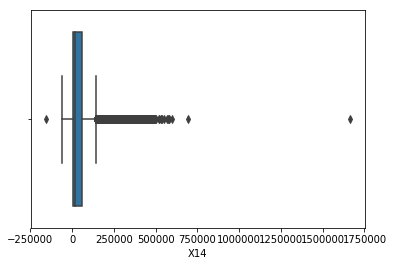

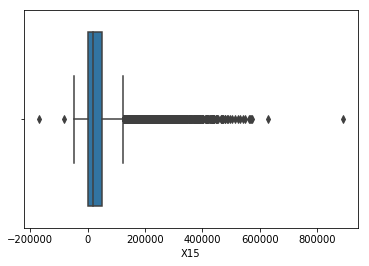

In [49]:
for col in ['X12', 'X13', 'X14', 'X15']:
  sns.boxplot(ntrain[col], )
  plt.show()

In [50]:
ntrain.drop('Ref.No', axis=1, inplace=True)

In [51]:
ntrain.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [52]:
x = ntrain.drop('Y', axis=1)
y = ntrain['Y']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=11, test_size=0.2)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17280, 15)
(4320, 15)
(17280,)
(4320,)


In [55]:
s = StandardScaler()
st = s.fit_transform(x_train)
ste = s.fit_transform(x_test)

In [56]:
lr = LogisticRegression()
lr.fit(st, y_train)
pred_lr = lr.predict(ste)

In [57]:
accuracy_score(y_test, pred_lr)

0.805787037037037

In [58]:
rf = RandomForestClassifier()
rf.fit(st, y_train)
pred_rf = rf.predict(ste)

In [59]:
accuracy_score(y_test, pred_rf)

0.8037037037037037

In [ ]:
param = {'n_estimators': np.arange(10,25),'criterion':['gini','entropy'], 'max_depth': range(2, 7), 'random_state': range(1, 50)}

grid1 = GridSearchCV(estimator=rf, param_grid=param, cv=5, scoring='accuracy')
grid1.fit(st,y_train)
print(grid1.best_params_)

In [ ]:
rf = RandomForestClassifier(n_estimators=22, criterion='entropy', verbose=0, n_jobs=-1)
rf.fit(st, y_train)
pred_rf = rf.predict(ste)

In [ ]:
accuracy_score(y_test, pred_rf)

In [0]:
citi_test = pd.read_csv(path1)

In [0]:
req = citi_test.iloc[:, 1:16]

In [0]:
req.shape

(2399, 15)

In [0]:
s =StandardScaler()
req_s = s.fit_transform(req)

In [0]:
req_s.shape

(2399, 15)

In [0]:
pred_rf_f = rf.predict(req_s)

In [0]:
# submission
sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sample_submission.csv")
solution = pd.DataFrame({'ref.no':sample['Ref.No'], 'Y':pred_rf_f})
# export to kaggle
solution.to_csv('citi_rf(2).csv', index= False)